# Analyzing Where Do People Drink

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

C:\Users\msesetty\AppData\Local\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df= pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/edx/project/drinks.csv')

In [3]:
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


# Question 1: Display the data types of each column using the attribute dtype.

In [4]:
df.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

# Question 2 use the method groupby to get the number of wine servings per continent:

In [6]:
df_Wine = df[['continent','wine_servings']]
df_winegrp = df_Wine.groupby(['continent'], as_index=False).sum()
df_winegrp

,continent,wine_servings
0,Africa,862
1,Asia,399
2,Europe,6400
3,North America,564
4,Oceania,570
5,South America,749


# Question 3: Perform a statistical summary and analysis of beer servings for each continent:

In [7]:
df_beer = df[['continent','beer_servings']]
df_beergrp = df_beer.groupby(['continent'], as_index=True).describe()
df_beergrp

beer_servings                                              \
                      count        mean        std   min     25%    50%   
continent                                                                 
Africa                 53.0   61.471698  80.557816   0.0   15.00   32.0   
Asia                   44.0   37.045455  49.469725   0.0    4.25   17.5   
Europe                 45.0  193.777778  99.631569   0.0  127.00  219.0   
North America          23.0  145.434783  79.621163   1.0   80.00  143.0   
Oceania                16.0   89.687500  96.641412   0.0   21.00   52.5   
South America          12.0  175.083333  65.242845  93.0  129.50  162.5   

                              
                  75%    max  
continent                     
Africa          76.00  376.0  
Asia            60.50  247.0  
Europe         270.00  361.0  
North America  198.00  285.0  
Oceania        125.75  306.0  
South America  198.00  333.0

# Question 4: Use the function boxplot in the seaborn library to produce a plot that can be used to show the number of beer servings on each continent.

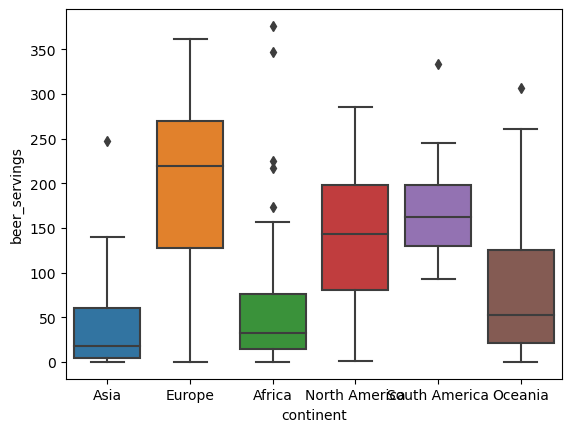

In [8]:
import seaborn as sns 
sns.boxplot(x="continent", y="beer_servings", data=df_beer)
plt.show()

# Question 5: Use the function  regplot in the seaborn library to determine if the number of wine servings is negatively or positively correlated with the number of beer servings.

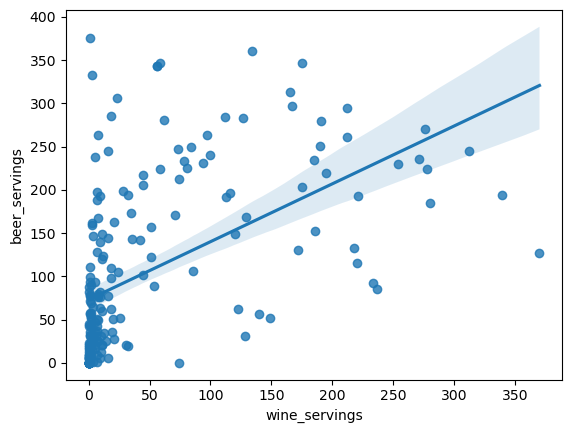

In [10]:
import seaborn as sns 
sns.regplot(x="wine_servings", y="beer_servings", data=df)
plt.show()
# Beer servings & Wine servings appear to be positively correlated.
# Also seems like there maybe some places where only Beer is served.

# Question 6: Fit a linear regression model to predict the 'total_litres_of_pure_alcohol' using the number of 'wine_servings' then calculate 
:

In [11]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
x = df[['wine_servings']]
y = df['total_litres_of_pure_alcohol']
lm.fit(x,y)
yhat = lm.predict(x)
print(yhat[0:5])
print("Intercept is ",lm.intercept_)
print("Slope is ",lm.coef_)
print("R^2 is ",lm.score(x,y))

[ 3.15407943  4.86088833  3.59658545 13.01564196  4.57642018]
Intercept is  3.1540794346874996
Slope is  [0.03160757]
R^2 is  0.4456875459787605


# Question 7
Use the list of features to predict the 'total_litres_of_pure_alcohol', split the data into training and testing and determine the 
 on the test data, using the provided code:

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x_data = df[['beer_servings','spirit_servings','wine_servings']]
y_data = df['total_litres_of_pure_alcohol']
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.4, random_state=0)
lr = LinearRegression()
lr.fit(x_train, y_train)
print("Train Data R^2:", lr.score(x_train, y_train))
print("Test Data R^2:", lr.score(x_test, y_test))

Train Data R^2: 0.9471204262013297
Test Data R^2: 0.7370737388267039


# Question 8 : Create a pipeline object that scales the data, performs a polynomial transform and fits a linear regression model. Fit the object using the training data in the question above, then calculate the R^2 using. the test data. Take a screenshot of your code and the 


In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.4, random_state=0)

input =[('scale',StandardScaler()),('polynomial',PolynomialFeatures(include_bias=False,degree=2)),('model',LinearRegression())]
pipe = Pipeline(input)
pipe.fit(x_train, y_train)
yhat = pipe.predict(x_data)
print("R^2 using Test data is", pipe.score(x_test, y_test))
print("R^2 using Training data is", pipe.score(x_train, y_train))

R^2 using Test data is 0.7594556586231647
R^2 using Training data is 0.9555197146227157


# Question 9: Create and fit a Ridge regression object using the training data, setting the regularization parameter to 0.1 and calculate the 
 using the test data. Take a screenshot of your code and the 

In [14]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.4, random_state=0)
RidgeModel = Ridge(alpha=0.1)
RidgeModel.fit(x_train, y_train)
yhat = RidgeModel.predict(x_test)
print("Test R^2:",RidgeModel.score(x_test, y_test))
print("Train R^2:",RidgeModel.score(x_train, y_train))

Test R^2: 0.7370737565866847
Train R^2: 0.9471204262013262


# Question 10 : Perform a 2nd order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data, setting the regularization parameter to 0.1. Calculate the 
 utilizing the test data provided. Take a screen-shot of your code and the 
.

In [15]:
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
RidgeModel_pr = Ridge(alpha=0.1)
RidgeModel_pr.fit(x_train_pr, y_train)
print("RidgeModel Test data R^2: ",RidgeModel_pr.score(x_test_pr, y_test))
print("RidgeModel Train data R^2: ",RidgeModel_pr.score(x_train_pr, y_train))

RidgeModel Test data R^2:  0.7594556764530758
RidgeModel Train data R^2:  0.9555197146226246
